In [126]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

*Date, Averageprice, Type, Year, Region some relevent columns in this dataset

*The dataset can be seen in two angles to find the region and find the average price 


In [127]:
import pandas as pd
df=pd.read_csv("Avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [128]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [129]:
''''''''''def augFeatures(df):
    df['Date']= pd.to_datetime(df['Date'])
    df['year']= df['Date'].dt.year
    df['month']= df['Date'].dt.month
    df['date']= df['Date'].dt.day
    df['day']= df['Date'].dt.dayofweek
    df= df.drop(['Date'],axis=1,inplace=True)
    return df

df_feat=augFeatures(df)
'''''''''''''''

"'def augFeatures(df):\n    df['Date']= pd.to_datetime(df['Date'])\n    df['year']= df['Date'].dt.year\n    df['month']= df['Date'].dt.month\n    df['date']= df['Date'].dt.day\n    df['day']= df['Date'].dt.dayofweek\n    df= df.drop(['Date'],axis=1,inplace=True)\n    return df\n\ndf_feat=augFeatures(df)\n"

In [130]:
df['Date']= pd.to_datetime(df.Date, format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


Firstly i can change the date format object to datetime

In [131]:
df.set_index('Date',inplace=True)
df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
2018-01-28,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
2018-01-21,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico


now i can change index to date

In [132]:
df.isnull().sum()

Unnamed: 0      0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no null value in this dataset

In [133]:
df.nunique().to_frame("no of unique values")

,no of unique values
Unnamed: 0,53
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082
XLarge Bags,5588


In [134]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


This gives the statistical information of the numerical column.

From the above description we can observe the following:
        
   1. The count of all the columns are same means there are no missing values
   2. The mean value is greater then the median in Total Volumne, Large Bags, XLarge Bags means the data is skewed in right side
   3.The other data columns values median is greater then mean means the data is skewed in left side
   4.By checking the difference between the 75% and max value there are outliers in some of the column

In [135]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [136]:
from tqdm import tqdm

In [137]:
from time import sleep

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')


100%|██████████| 12/12 [01:32<00:00,  7.72s/it]


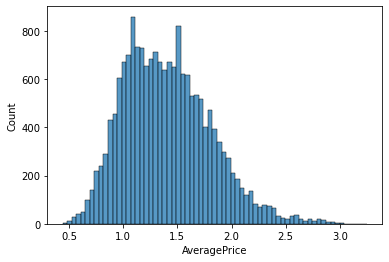

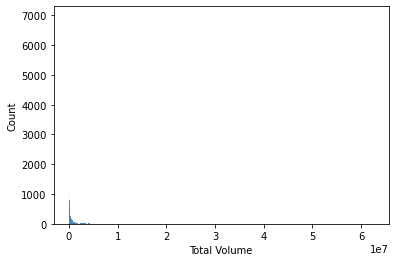

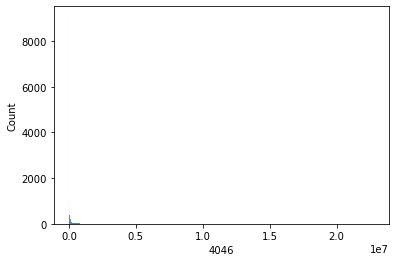

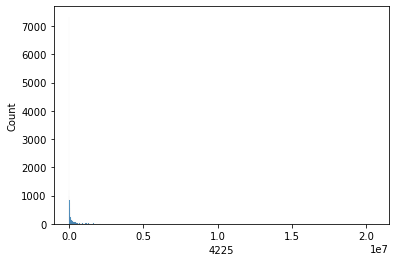

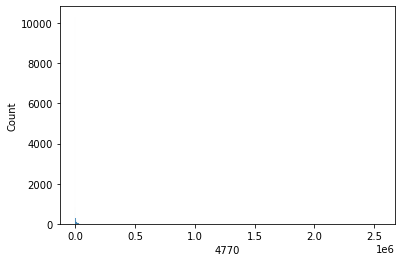

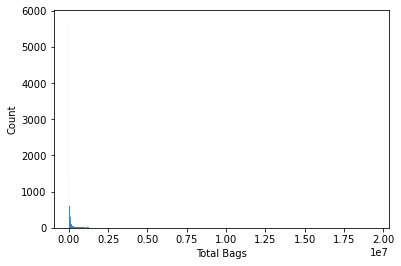

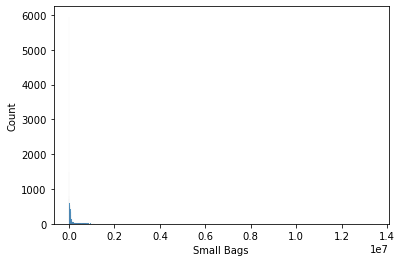

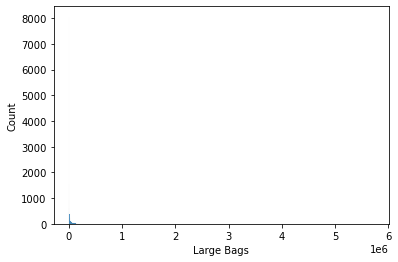

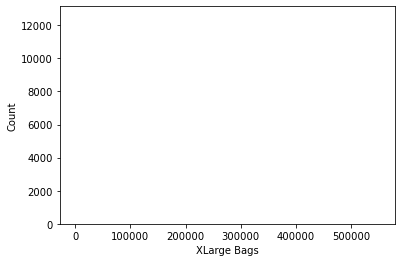

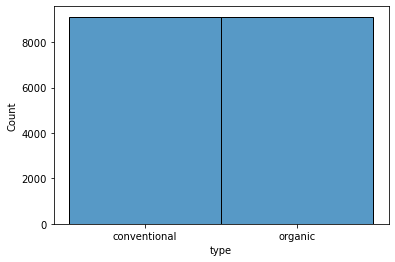

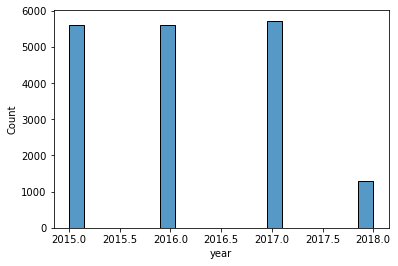

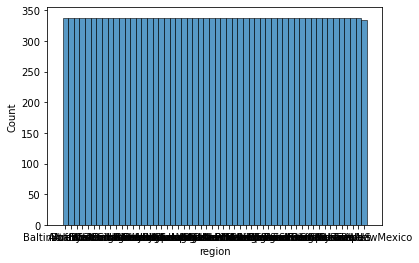

In [139]:
M = df.columns
print(M)
for i in tqdm(M):
    plt.figure()
    sns.histplot(df[i])

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

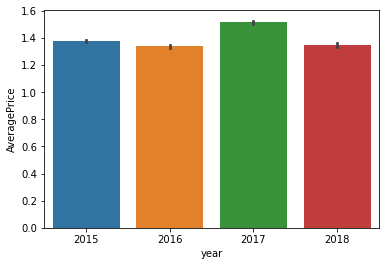

In [141]:
sns.barplot(x='year', y='AveragePrice',data=df)
#print(df['Total Volume'].value_counts())

i can compare year to average price and see average price in 2017 is very high compare to other year

<AxesSubplot:xlabel='XLarge Bags', ylabel='region'>

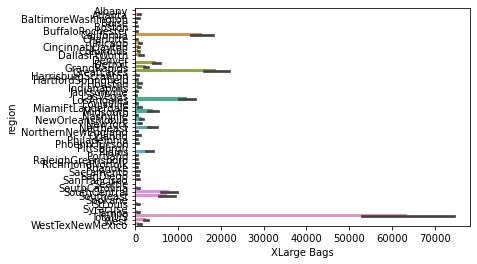

In [142]:
sns.barplot(x='XLarge Bags', y='region',data=df)

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

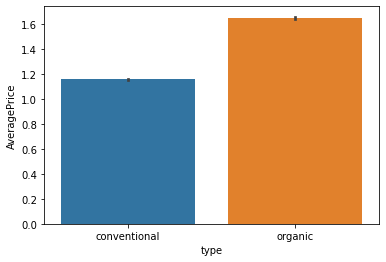

In [143]:
sns.barplot(x='type', y='AveragePrice',data=df)

price of oraganic avocado is very high compare to conventional type avocado

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

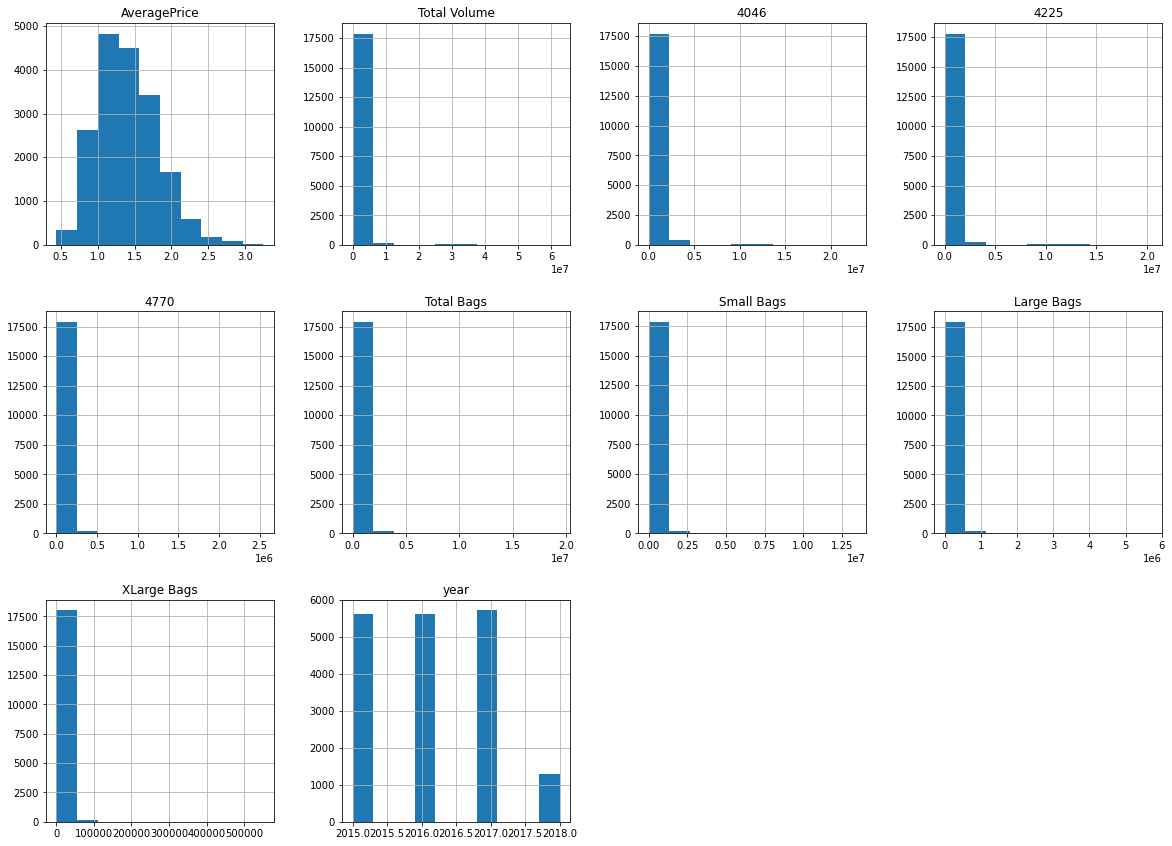

In [144]:
df.hist(figsize=(20,20),grid=True,layout=(4,4))

Now i can see that many column data have left skewrd so firstly i can remove skewness from this columns

In [145]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [146]:
from scipy.stats import skew

In [148]:
df['XLarge Bags']=np.cbrt(df['XLarge Bags'])
df['Total Volume']=np.cbrt(df['Total Volume'])
df['4225']=np.cbrt(df['4225'])
df['4046']=np.cbrt(df['4046'])
df['Total Bags']=np.cbrt(df['Total Bags'])
df['4770']=np.cbrt(df['4770'])
df['Small Bags']=np.cbrt(df['Small Bags'])
df['Large Bags']=np.cbrt(df['Large Bags'])



In [149]:
df.skew()

AveragePrice    0.580303
Total Volume    0.624128
4046            0.296549
4225            0.248376
4770           -0.014697
Total Bags      0.473809
Small Bags      0.043672
Large Bags     -0.499222
XLarge Bags     1.023563
year            0.215339
dtype: float64

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

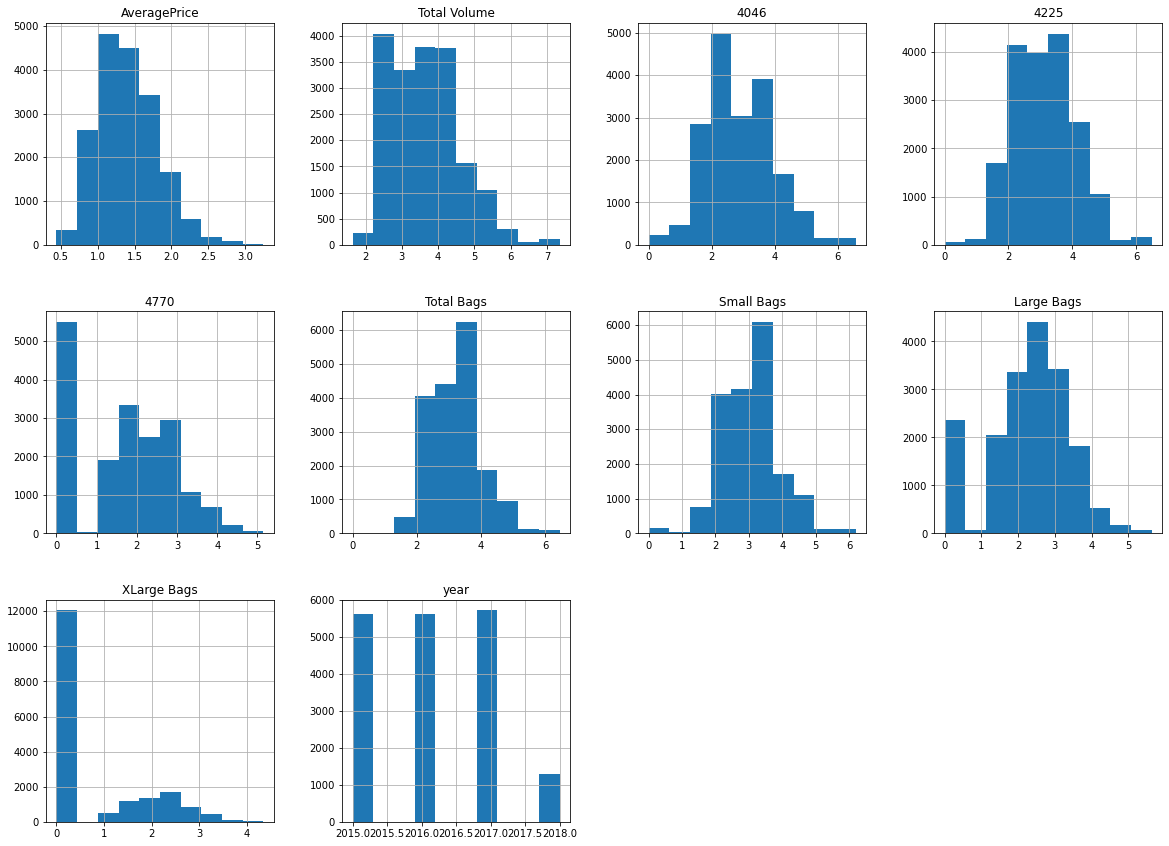

In [150]:
df.hist(figsize=(20,20),grid=True,layout=(4,4))

Now skewness has been removed from all the columns 

# Encoding The Column Through One Hot Encoder

In [151]:
from sklearn.preprocessing import OrdinalEncoder

In [152]:
OE=OrdinalEncoder()    
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,3.421355,2.163089,3.359126,1.538031,2.739725,2.736445,1.655198,0.0,0.0,2015,0.0
2015-12-20,1.35,3.362009,2.062128,3.285752,1.571123,2.766926,2.763758,1.663396,0.0,0.0,2015,0.0
2015-12-13,0.93,3.661276,2.100123,3.628944,1.718177,2.719854,2.716005,1.673841,0.0,0.0,2015,0.0
2015-12-06,1.08,3.500870,2.184320,3.464877,1.609746,2.619699,2.612930,1.722894,0.0,0.0,2015,0.0
2015-11-29,1.28,3.335038,2.140048,3.279153,1.617482,2.637860,2.628355,1.799324,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,1.63,2.952989,2.332926,2.258548,0.000000,2.876877,2.866502,1.962523,0.0,1.0,2018,53.0
2018-01-28,1.71,2.885981,2.196829,2.470766,0.000000,2.759051,2.748133,1.901378,0.0,1.0,2018,53.0
2018-01-21,1.87,2.883170,2.196874,2.380285,2.079748,2.763302,2.761917,1.516058,0.0,1.0,2018,53.0


Here we can encode the data through object to int value with the help of one hot encoder

# Removing Outlyers on this data

In [153]:
from scipy.stats import zscore

In [154]:
z=np.abs(zscore(df))
z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,0.188689,0.224969,0.678881,0.247619,0.085030,0.575785,0.362142,0.531393,0.676729,0.999836,1.221282,1.700252
2015-12-20,0.139020,0.288169,0.773376,0.170103,0.058762,0.541656,0.330054,0.524247,0.676729,0.999836,1.221282,1.700252
2015-12-13,1.182069,0.030537,0.737814,0.532667,0.057967,0.600717,0.386157,0.515144,0.676729,0.999836,1.221282,1.700252
2015-12-06,0.809551,0.140288,0.659010,0.359339,0.028103,0.726378,0.507256,0.472390,0.676729,0.999836,1.221282,1.700252
2015-11-29,0.312861,0.316892,0.700447,0.163131,0.021963,0.703592,0.489134,0.405775,0.676729,0.999836,1.221282,1.700252
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,0.556347,0.723757,0.519922,0.915081,1.305897,0.403704,0.209344,0.263534,0.676729,1.000164,1.970504,1.700811
2018-01-28,0.755023,0.795118,0.647302,0.690885,1.305897,0.551537,0.348411,0.316827,0.676729,1.000164,1.970504,1.700811
2018-01-21,1.152375,0.798112,0.647260,0.786473,0.344977,0.546203,0.332217,0.652664,0.676729,1.000164,1.970504,1.700811


In [155]:
threshold=3
print(np.where(z>3))

(array([ 2652,  2652,  2652, ..., 17304, 17402, 17428], dtype=int64), array([1, 3, 5, ..., 0, 0, 0], dtype=int64))


In [156]:
df1=df[(z<3).all(axis=1)]
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,3.421355,2.163089,3.359126,1.538031,2.739725,2.736445,1.655198,0.0,0.0,2015,0.0
2015-12-20,1.35,3.362009,2.062128,3.285752,1.571123,2.766926,2.763758,1.663396,0.0,0.0,2015,0.0
2015-12-13,0.93,3.661276,2.100123,3.628944,1.718177,2.719854,2.716005,1.673841,0.0,0.0,2015,0.0
2015-12-06,1.08,3.500870,2.184320,3.464877,1.609746,2.619699,2.612930,1.722894,0.0,0.0,2015,0.0
2015-11-29,1.28,3.335038,2.140048,3.279153,1.617482,2.637860,2.628355,1.799324,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,1.63,2.952989,2.332926,2.258548,0.000000,2.876877,2.866502,1.962523,0.0,1.0,2018,53.0
2018-01-28,1.71,2.885981,2.196829,2.470766,0.000000,2.759051,2.748133,1.901378,0.0,1.0,2018,53.0
2018-01-21,1.87,2.883170,2.196874,2.380285,2.079748,2.763302,2.761917,1.516058,0.0,1.0,2018,53.0


In [157]:
loss_percent=(18249-17212)/18249*100
print(loss_percent)

5.682503150857581


after removing outlyers we can loss only 5.68% data and this loss is acceptable

# Seperating Target And Independent Variable

In [158]:
x=df1.drop('region',axis=1)
y=df1.iloc[:,11:12]


In [159]:
y

,region
Date,
2015-12-27,0.0
2015-12-20,0.0
2015-12-13,0.0
2015-12-06,0.0
2015-11-29,0.0
...,...
2018-02-04,53.0
2018-01-28,53.0
2018-01-21,53.0


# feature scaling using standard scaler

In [160]:
from sklearn.preprocessing import MinMaxScaler
st = MinMaxScaler()
x = st.fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10
0,0.410138,0.401995,0.388344,0.510259,0.339463,0.373310,0.386757,0.317574,0.0,0.0,0.0
1,0.419355,0.388623,0.370218,0.494212,0.346767,0.379632,0.393244,0.319147,0.0,0.0,0.0
2,0.225806,0.456056,0.377039,0.569269,0.379223,0.368692,0.381902,0.321151,0.0,0.0,0.0
3,0.294931,0.419912,0.392155,0.533387,0.355291,0.345414,0.357419,0.330562,0.0,0.0,0.0
4,0.387097,0.382546,0.384207,0.492769,0.356998,0.349635,0.361083,0.345226,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
17727,0.548387,0.296459,0.418835,0.269560,0.000000,0.405187,0.417648,0.376538,0.0,1.0,1.0
17728,0.585253,0.281361,0.394401,0.315972,0.000000,0.377802,0.389533,0.364807,0.0,1.0,1.0
17729,0.658986,0.280727,0.394409,0.296184,0.459026,0.378790,0.392807,0.290878,0.0,1.0,1.0
17730,0.686636,0.292606,0.405435,0.307589,0.458961,0.389950,0.404201,0.296325,0.0,1.0,1.0


# checking variance inflation factor(VIF)

In [161]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [162]:
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif["features"] = x.columns      

vif

,VIF values,features
0,12.792562,0
1,391.460603,1
2,50.574940,2
3,91.616452,3
4,10.886465,4
5,323.434577,5
6,162.666478,6
7,15.682281,7
8,3.074269,8
9,6.907681,9


In [163]:
x = x.drop([1], axis=1)

Here i am remove the Total volume column because the VIF of this column is very high

In [164]:
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif["features"] = x.columns      

vif

,VIF values,features
0,10.774216,0
1,28.703809,2
2,33.726541,3
3,10.816731,4
4,263.035211,5
5,159.264199,6
6,15.567935,7
7,3.052844,8
8,6.550158,9
9,3.559639,10


In [165]:
x = x.drop([4], axis=1)

Here i am remove the Totalbags column because the VIF of this column is very high

In [166]:
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif["features"] = x.columns      

vif

,VIF values,features
0,10.671898,0
1,28.489797,2
2,31.888864,3
3,262.963986,5
4,158.356359,6
5,15.477560,7
6,3.006403,8
7,5.871833,9
8,3.412511,10


In [167]:
from imblearn.over_sampling import SMOTE
st=SMOTE()
x,y=st.fit_resample(x,y)

In [168]:
y.value_counts()

region
0.0       338
40.0      338
29.0      338
30.0      338
31.0      338
32.0      338
33.0      338
34.0      338
35.0      338
36.0      338
37.0      338
38.0      338
39.0      338
41.0      338
1.0       338
42.0      338
43.0      338
44.0      338
45.0      338
46.0      338
47.0      338
48.0      338
49.0      338
50.0      338
51.0      338
52.0      338
28.0      338
27.0      338
26.0      338
25.0      338
2.0       338
3.0       338
4.0       338
5.0       338
6.0       338
7.0       338
8.0       338
9.0       338
10.0      338
11.0      338
12.0      338
13.0      338
14.0      338
15.0      338
16.0      338
17.0      338
18.0      338
19.0      338
20.0      338
21.0      338
22.0      338
23.0      338
24.0      338
53.0      338
dtype: int64

our data is not balanced we can use over sampling method for balanced the data

# Now we go for data modelling

# Finding the best random state

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
RFR=RandomForestClassifier()
maxaccu = 0
maxrs = 0

In [170]:
for i in tqdm(range(1,100)):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state = i)
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxaccu:
        maxaccu = acc
        maxrs = i

print("Best Accuracy score is:",maxaccu,'at Random state:',maxrs)

100%|██████████| 99/99 [12:16<00:00,  7.44s/it]

Best Accuracy score is: 0.8756391526661796 at Random state: 32


In [171]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state = maxrs)

# Classification Algorithums &  Cross Validation Score

In [172]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
lg=LogisticRegression()
gnb=GaussianNB()
mnb= MultinomialNB()
dtc= DecisionTreeClassifier()
svm=SVC()
knn=KNeighborsClassifier()
RFC=RandomForestClassifier()
ETC=ExtraTreesClassifier()
model=[lg,gnb,mnb,dtc,svm,knn,RFC,ETC]

In [173]:
for M in tqdm(model):
    M.fit(x_train,y_train)
    pred=M.predict(x_test)
    print('accuracy score of ',M,'is',)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    #score=cross_val_score(M,x,y,cv=5)
    #print(score)
    #print(score.mean())
    #print('difference between and cross validation score is',accuracy_score(y_test,pred) - score.mean())
    print("\n")

 25%|██▌       | 2/8 [00:08<00:20,  3.45s/it]

accuracy score of  LogisticRegression() is
0.36431701972242514
[[47  0  0 ...  0  0  0]
 [ 0 23  0 ...  0  0  0]
 [ 0  0 18 ...  0  0  1]
 ...
 [ 0  0  0 ... 96  0  0]
 [ 0  0  0 ...  3 70  0]
 [ 0 10  0 ...  0  0  7]]
              precision    recall  f1-score   support

         0.0       0.33      0.49      0.39        96
         1.0       0.20      0.24      0.22        95
         2.0       0.53      0.14      0.22       132
         3.0       0.29      0.43      0.35        94
         4.0       0.32      0.42      0.36       105
         5.0       0.20      0.28      0.23        78
         6.0       0.76      0.80      0.78       124
         7.0       0.34      0.12      0.18       104
         8.0       0.48      0.65      0.55       100
         9.0       0.36      0.72      0.48        98
        10.0       0.58      0.17      0.26       114
        11.0       0.39      0.48      0.43       101
        12.0       0.43      0.52      0.47       116
        13.0       0.20 

 50%|█████     | 4/8 [00:08<00:05,  1.43s/it]

accuracy score of  DecisionTreeClassifier() is
0.7518261504747992
[[ 73   0   0 ...   0   0   0]
 [  0  60   0 ...   0   0   0]
 [  0   4 102 ...   0   0   4]
 ...
 [  0   0   0 ...  96   0   0]
 [  0   0   0 ...   0  77   0]
 [  0   7   3 ...   0   0  61]]
              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75        96
         1.0       0.59      0.63      0.61        95
         2.0       0.82      0.77      0.80       132
         3.0       0.78      0.77      0.77        94
         4.0       0.81      0.93      0.87       105
         5.0       0.64      0.63      0.64        78
         6.0       0.94      0.90      0.92       124
         7.0       0.66      0.70      0.68       104
         8.0       0.83      0.80      0.82       100
         9.0       0.78      0.77      0.77        98
        10.0       0.73      0.61      0.67       114
        11.0       0.84      0.85      0.85       101
        12.0       0.86      0.88      

 62%|██████▎   | 5/8 [00:33<00:25,  8.59s/it]

accuracy score of  SVC() is
0.66672753834916
[[83  0  0 ...  0  0  0]
 [ 0 45  0 ...  0  0  6]
 [ 0  0 87 ...  0  0  7]
 ...
 [ 0  0  0 ... 96  0  0]
 [ 0  0  0 ...  0 79  0]
 [ 0  4  1 ...  0  0 51]]
              precision    recall  f1-score   support

         0.0       0.57      0.86      0.69        96
         1.0       0.35      0.47      0.40        95
         2.0       0.91      0.66      0.76       132
         3.0       0.64      0.76      0.69        94
         4.0       0.88      0.72      0.80       105
         5.0       0.51      0.55      0.53        78
         6.0       0.96      0.81      0.88       124
         7.0       0.59      0.59      0.59       104
         8.0       0.98      0.89      0.93       100
         9.0       0.56      0.72      0.63        98
        10.0       0.61      0.39      0.48       114
        11.0       0.76      0.80      0.78       101
        12.0       0.85      0.78      0.81       116
        13.0       0.43      0.44      0.4

 75%|███████▌  | 6/8 [00:33<00:12,  6.09s/it]

accuracy score of  KNeighborsClassifier() is
0.7821402483564646
[[ 84   0   0 ...   0   0   0]
 [  0  66   0 ...   0   0   2]
 [  0   0 103 ...   0   0   2]
 ...
 [  0   0   0 ...  96   0   0]
 [  0   0   0 ...   0  78   0]
 [  0   3   1 ...   0   0  72]]
              precision    recall  f1-score   support

         0.0       0.76      0.88      0.81        96
         1.0       0.61      0.69      0.65        95
         2.0       0.86      0.78      0.82       132
         3.0       0.73      0.79      0.76        94
         4.0       0.88      0.86      0.87       105
         5.0       0.66      0.69      0.68        78
         6.0       0.97      0.94      0.96       124
         7.0       0.67      0.84      0.75       104
         8.0       0.87      0.89      0.88       100
         9.0       0.73      0.74      0.74        98
        10.0       0.66      0.66      0.66       114
        11.0       0.84      0.92      0.88       101
        12.0       0.88      0.78      0.

 88%|████████▊ | 7/8 [00:41<00:06,  6.44s/it]

accuracy score of  RandomForestClassifier() is
0.8752739225712198
[[ 87   0   0 ...   0   0   0]
 [  0  81   0 ...   0   0   0]
 [  0   0 116 ...   0   0   2]
 ...
 [  0   0   0 ...  96   0   0]
 [  0   0   0 ...   0  80   0]
 [  0   2   1 ...   0   0  79]]
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87        96
         1.0       0.86      0.85      0.86        95
         2.0       0.96      0.88      0.92       132
         3.0       0.87      0.93      0.90        94
         4.0       0.94      0.97      0.96       105
         5.0       0.74      0.73      0.74        78
         6.0       0.98      0.97      0.98       124
         7.0       0.75      0.88      0.81       104
         8.0       0.95      0.94      0.94       100
         9.0       0.82      0.86      0.84        98
        10.0       0.88      0.75      0.81       114
        11.0       0.94      0.94      0.94       101
        12.0       0.93      0.96      

100%|██████████| 8/8 [00:44<00:00,  5.61s/it]

accuracy score of  ExtraTreesClassifier() is
0.8920745069393718
[[ 83   0   0 ...   0   0   0]
 [  0  79   0 ...   0   0   1]
 [  0   0 118 ...   0   0   2]
 ...
 [  0   0   0 ...  96   0   0]
 [  0   0   0 ...   0  78   0]
 [  0   1   2 ...   0   0  84]]
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85        96
         1.0       0.86      0.83      0.84        95
         2.0       0.96      0.89      0.93       132
         3.0       0.86      0.95      0.90        94
         4.0       0.96      0.98      0.97       105
         5.0       0.79      0.79      0.79        78
         6.0       0.98      0.98      0.98       124
         7.0       0.86      0.91      0.88       104
         8.0       0.97      0.96      0.96       100
         9.0       0.86      0.88      0.87        98
        10.0       0.92      0.76      0.83       114
        11.0       0.92      0.95      0.94       101
        12.0       0.96      0.95      0.

In [49]:
for M in tqdm(model):
    score=cross_val_score(M,x,y,cv=5)
    print(score)
    print(score.mean())
    print('difference between and cross validation score is',accuracy_score(y_test,pred) - score.mean())
    print("\n")

 12%|█▎        | 1/8 [00:41<04:48, 41.28s/it]

[0.29909614 0.31169543 0.37013699 0.30465753 0.19972603]
0.29706242238005726
difference between and cross validation score is 0.5933685491319953




 25%|██▌       | 2/8 [00:41<01:42, 17.13s/it]

[0.05861408 0.04437141 0.07643836 0.08219178 0.05917808]
0.06415874052145594
difference between and cross validation score is 0.8262722309905967




 38%|███▊      | 3/8 [00:41<00:47,  9.41s/it]

[0.04245412 0.06381813 0.07534247 0.02109589 0.0290411 ]
0.046350341246346474
difference between and cross validation score is 0.8440806302657061




 50%|█████     | 4/8 [00:43<00:25,  6.25s/it]

[0.50999726 0.60202684 0.56849315 0.49315068 0.40164384]
0.515062354843672
difference between and cross validation score is 0.3753686166683806




 62%|██████▎   | 5/8 [02:37<02:15, 45.28s/it]

[0.53273076 0.57217201 0.57150685 0.51452055 0.29232877]
0.49665178614978817
difference between and cross validation score is 0.39377918536226447




 75%|███████▌  | 6/8 [02:39<01:01, 30.54s/it]

[0.30101342 0.46562586 0.53123288 0.3509589  0.18767123]
0.3673004581218131
difference between and cross validation score is 0.5231305133902395




 88%|████████▊ | 7/8 [03:17<00:32, 32.94s/it]

[0.61983018 0.76006574 0.70684932 0.62493151 0.45561644]
0.6334586358400588
difference between and cross validation score is 0.25697233567199385




100%|██████████| 8/8 [03:34<00:00, 26.87s/it]

[0.66858395 0.74609696 0.71945205 0.61178082 0.43178082]
0.6355389215940088
difference between and cross validation score is 0.2548920499180438




ExtraTreesClassifier give very high accuracy compare to other algorithums with low cross validation score______________________accuracy is 89.20% and CVS is .25% on the basis of this points i can select ExtraTreesClassifier

# Hyper Parameter Tuning

In [174]:
from sklearn.model_selection import GridSearchCV

In [175]:
parameters = {'criterion':['gini', 'entropy'],
             'n_estimators':[50,100,200,350],
             'max_depth':[0,10,20,30],
             'random_state':[10,50,1000]}

In [176]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [58]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 30, 'n_estimators': 350, 'random_state': 50}

In [177]:
final= ExtraTreesClassifier(criterion='entropy', max_depth=20 , n_estimators= 350, random_state= 10)
final.fit(x_train, y_train)
pred=final.predict(x_test)
acc= accuracy_score(y_test,pred)
print(acc*100)

89.29875821767713


With the help of hyper parameter tuning accuracy of my model have been increased by .10% now my new accuracy is 89.30%


# Saving the model using PKl

In [100]:
import pickle
pickle.dump(final,open('Avokado dataset Analysis','wb'))

In [105]:
loaded_model= pickle.load(open("Avokado dataset Analysis","rb"))
prediction= loaded_model.predict(x_test)
a= np.array(y_test)
df=pd.DataFrame()
df['predicted']= prediction
df['actual']= a
df

,predicted,actual
0,16.0,16.0
1,49.0,49.0
2,20.0,20.0
3,17.0,17.0
4,48.0,48.0
...,...,...
5471,18.0,18.0
5472,10.0,26.0
5473,24.0,24.0
5474,32.0,32.0


# In second prediction my target variable is Average Price

In [70]:
x=df1.drop('AveragePrice',axis=1)
y=df1.iloc[:,0:1]

In [71]:
y

,AveragePrice
Date,
2015-12-27,1.33
2015-12-20,1.35
2015-12-13,0.93
2015-12-06,1.08
2015-11-29,1.28
...,...
2018-02-04,1.63
2018-01-28,1.71
2018-01-21,1.87


In [72]:
from sklearn.preprocessing import MinMaxScaler
st = MinMaxScaler()
x = st.fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10
0,0.401995,0.388344,0.510259,0.339463,0.373310,0.386757,0.317574,0.0,0.0,0.0,0.0
1,0.388623,0.370218,0.494212,0.346767,0.379632,0.393244,0.319147,0.0,0.0,0.0,0.0
2,0.456056,0.377039,0.569269,0.379223,0.368692,0.381902,0.321151,0.0,0.0,0.0,0.0
3,0.419912,0.392155,0.533387,0.355291,0.345414,0.357419,0.330562,0.0,0.0,0.0,0.0
4,0.382546,0.384207,0.492769,0.356998,0.349635,0.361083,0.345226,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
17727,0.296459,0.418835,0.269560,0.000000,0.405187,0.417648,0.376538,0.0,1.0,1.0,1.0
17728,0.281361,0.394401,0.315972,0.000000,0.377802,0.389533,0.364807,0.0,1.0,1.0,1.0
17729,0.280727,0.394409,0.296184,0.459026,0.378790,0.392807,0.290878,0.0,1.0,1.0,1.0
17730,0.292606,0.405435,0.307589,0.458961,0.389950,0.404201,0.296325,0.0,1.0,1.0,1.0


With the help of MinMax scaller i can balanced my data from 0 to 1

In [73]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif["features"] = x.columns      

vif

,VIF values,features
0,333.609569,0
1,48.570131,1
2,68.938265,2
3,10.853431,3
4,324.961608,4
5,154.516483,5
6,15.576202,6
7,3.089379,7
8,4.536508,8
9,3.430646,9


In [75]:
x = x.drop([4], axis=1)

In [76]:
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif["features"] = x.columns      

vif

,VIF values,features
0,257.268502,0
1,46.925074,1
2,65.756612,2
3,10.828722,3
4,70.732422,5
5,10.117387,6
6,3.088863,7
7,3.797933,8
8,3.283331,9
9,4.167051,10


In [77]:
x = x.drop([0], axis=1)

In [78]:
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif["features"] = x.columns      

vif

,VIF values,features
0,29.685083,1
1,28.240460,2
2,10.722227,3
3,36.375198,5
4,9.061827,6
5,3.070960,7
6,2.796305,8
7,3.235521,9
8,4.136339,10


In [79]:
x = x.drop([3], axis=1)

In [80]:
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif["features"] = x.columns      

vif

,VIF values,features
0,29.462481,1
1,25.842987,2
2,35.107015,5
3,8.992094,6
4,3.021135,7
5,2.375542,8
6,3.122345,9
7,4.133067,10


# Now we go for data modelling

# Finding the best random state

In [81]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import cross_val_score

In [82]:
maxaccu=0
maxRS=0
for i in tqdm(range(1,10)):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state = i)
    RFR = RandomForestRegressor()
    RFR.fit(x_train, y_train)
    pred= RFR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc > maxaccu:
        maxaccu = acc
        masRS = i
print("maximum r2 score is",maxaccu,"on random state is",maxRS)

100%|██████████| 9/9 [01:04<00:00,  7.20s/it]

maximum r2 score is 0.8452703700084401 on random state is 0


In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state = maxrs)

# Regressor Algorithums &  Cross Validation Score

In [84]:
Lr=LinearRegression()
dtc= DecisionTreeRegressor()
knn=KNeighborsRegressor()
RFC=RandomForestRegressor()
lasso=Lasso()
rd=Ridge()
ETR=ExtraTreesRegressor()
svr= SVR()
model=[Lr,dtc,knn,RFC,lasso,rd,ETR,svr]

for M in tqdm(model):
    M.fit(x_train,y_train)
    pred=M.predict(x_test)
    pred_train=M.predict(x_train)
    print('r2 score of ',M,'is',)
    print("R2_score:",r2_score(y_test,pred))
    print("R2_score on training data:",r2_score(y_train,pred_train)*100)
    print("MAE:",mean_absolute_error(y_test,pred))
    print("MSE",mean_squared_error(y_test,pred))
    print("Root MSE",np.sqrt(mean_squared_error(y_test,pred)))
    print("\n")
    print(M)
    score=cross_val_score(M,x,y,cv=5)
    print(score)
    print(score.mean())
    print('difference between and cross validation score is',r2_score(y_test,pred) - score.mean())
    print("\n")

 12%|█▎        | 1/8 [00:00<00:00,  7.53it/s]

r2 score of  LinearRegression() is
R2_score: 0.46624774632942134
R2_score on training data: 48.17902434612782
MAE: 0.21916880164401806
MSE 0.0788519490749255
Root MSE 0.28080589216561236


LinearRegression()
[-0.19028487  0.11137174  0.43053885  0.09504901  0.08652807]
0.10664056126273942
difference between and cross validation score is 0.35960718506668193


r2 score of  DecisionTreeRegressor() is
R2_score: 0.6764090683535379
R2_score on training data: 100.0
MAE: 0.1447612781954887
MSE 0.04780453007518797
Root MSE 0.21864247088612032


DecisionTreeRegressor()


 25%|██▌       | 2/8 [00:01<00:03,  1.68it/s]

[-1.07845033 -0.27275749  0.00686761 -0.21228127 -0.33733249]
-0.37879079299839147
difference between and cross validation score is 1.0551998613519293


r2 score of  KNeighborsRegressor() is
R2_score: 0.8039686245255641
R2_score on training data: 88.1148726018895
MAE: 0.12090338345864662
MSE 0.02895998270676692
Root MSE 0.17017632827971968


KNeighborsRegressor()


 38%|███▊      | 3/8 [00:02<00:04,  1.01it/s]

[-0.22108376  0.18367627  0.30869244  0.12281415 -0.08008336]
0.06280314734348506
difference between and cross validation score is 0.741165477182079


r2 score of  RandomForestRegressor() is
R2_score: 0.8294763315479226
R2_score on training data: 97.75164016595254
MAE: 0.11130533834586465
MSE 0.025191694327067662
Root MSE 0.1587189160971926


RandomForestRegressor()


 62%|██████▎   | 5/8 [00:50<00:37, 12.44s/it]

[0.10659476 0.30129488 0.57721498 0.29770055 0.06247195]
0.26905542312657477
difference between and cross validation score is 0.5604209084213478


r2 score of  Lasso() is
R2_score: -0.00011899978872564887
R2_score on training data: 0.0
MAE: 0.3139103020603394
MSE 0.14774894512928408
Root MSE 0.384381249710862


Lasso()
[-3.69684666 -0.71424926 -0.02518997 -0.50416608 -0.85553836]
-1.1591980665786186
difference between and cross validation score is 1.159079066789893


r2 score of  Ridge() is
R2_score: 0.46624966435956594
R2_score on training data: 48.17851608276248
MAE: 0.21914982624613552
MSE 0.0788516657217139
Root MSE 0.280805387629429


Ridge()


 75%|███████▌  | 6/8 [00:50<00:16,  8.25s/it]

[-0.1882026   0.11134262  0.43075345  0.09492335  0.08631138]
0.10702564191726142
difference between and cross validation score is 0.3592240224423045


r2 score of  ExtraTreesRegressor() is
R2_score: 0.8558693686714597
R2_score on training data: 100.0
MAE: 0.1019847932330827
MSE 0.021292614922932333
Root MSE 0.1459198921426833


ExtraTreesRegressor()


 88%|████████▊ | 7/8 [01:14<00:13, 13.35s/it]

[0.16204269 0.36607392 0.59300961 0.35206183 0.14431757]
0.32350112355347915
difference between and cross validation score is 0.5323682451179805


r2 score of  SVR() is
R2_score: 0.6455612501443622
R2_score on training data: 67.69834204009616
MAE: 0.17048871973130608
MSE 0.05236172037045127
Root MSE 0.2288268349002172


SVR()


100%|██████████| 8/8 [03:06<00:00, 23.33s/it]

[-0.87510769  0.25141888  0.0995941   0.27691779 -0.49053495]
-0.14754237297400624
difference between and cross validation score is 0.7931036231183684




ExtraTree Regressor give very high accuracy compare to other algorithums with low cross validation score______________________accuracy is 85.58% and CVS is .53% on the basis of this points i can select ExtraTree Regressor

# Hyper Parameter Tuning

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
parameters = {'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [87]:
GCV=GridSearchCV(ExtraTreesRegressor(),parameters,cv=5)

In [101]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [98]:
final= ExtraTreesRegressor(max_depth=None,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 350)
final.fit(x_train, y_train)
pred= final.predict(x_test)
acc= r2_score(y_test, pred)
print("R2_score:",r2_score(y_test,pred))
#print("R2_score on training data:",r2_score(y_train,pred_train)*100)
print("MAE:",mean_absolute_error(y_test,pred))
print("MSE",mean_squared_error(y_test,pred))
print("Root MSE",np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.857686670457124
MAE: 0.10087957035445762
MSE 0.0210241424492865
Root MSE 0.14499704289842086


With the help of hyper parameter tuning accuracy of my model have been increased by .17% now my new accuracy is 89.30%


# Saving the model using .pkl

In [186]:
import pickle
pickle.dump(final,open('Avokado dataset Analysis 2','wb'))

In [187]:
loaded_model= pickle.load(open("Avokado dataset Analysis 2","rb"))
prediction= loaded_model.predict(x_test)
a= np.array(y_test)
df=pd.DataFrame()
df['predicted']= prediction
df['actual']= a
df

,predicted,actual
0,47.0,47.0
1,23.0,23.0
2,23.0,23.0
3,6.0,6.0
4,8.0,8.0
...,...,...
5471,10.0,10.0
5472,51.0,51.0
5473,39.0,39.0
5474,3.0,3.0
